# Combine BC with Oregon-Washington Landslide Dataset

## Overview
This notebook creates the combined Cascadia landslide dataset by merging British Columbia landslide data with the previously combined Oregon-Washington dataset.

**Prerequisites**: Complete Oregon-Washington combination and BC preprocessing

### Key Processing Steps:

1. **Load Regional Datasets**: 
   - Import Oregon-Washington merged dataset (or_wa_merged_landslides.geojson)
   - Load British Columbia processed dataset (bc_landslides.geojson)

2. **Schema Alignment**: 
   - Compare column structures between BC and Oregon-Washington datasets
   - Identify common and unique columns across regional datasets

3. **Coordinate System Standardization**: 
   - Ensure both datasets use consistent coordinate reference system (EPSG:4326)
   - Transform geometries if needed for compatibility

4. **Dataset Integration**: 
   - Merge BC data with Oregon-Washington data

5. **Final Combined Dataset**: 
   - Export final combined dataset for post-processing




In [1]:
import fiona
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
oregon_wa_landslides = gpd.read_file("./or_wa_merged_landslides.geojson")
print("Loaded GeoDataFrame shape:", oregon_wa_landslides.shape)
oregon_wa_landslides.head()

Loaded GeoDataFrame shape: (144789, 34)


,VOLUME,HS_HEIGHT,VOL,LANDSLIDE_ID,NAME,DESCRIPTION,TYPE_MOVE,YEAR,DEEP_SHAL,DAY,...,DATASET_LINK,REF_ID_COD,Shape_Length,Shape_Area,MOVE_CODE,AREA,FAIL_DEPTH,RELATIVE_AGE,MVMT_AZIMUTH_DEG,geometry
0,NaN,0.0,11291.700195,WASH_CO2,,Fan,Flow,NaN,,NaN,...,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,447.239405,11291.764767,DFL,11291.700195,0.0,Historic (<150yrs),0.0,"MULTIPOLYGON (((-122.88334 45.36111, -122.8832..."
1,NaN,0.0,13701.000000,WASH_CO3,,Fan,Flow,NaN,,NaN,...,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,455.775817,13701.014637,DFL,13701.000000,0.0,Historic (<150yrs),180.0,"MULTIPOLYGON (((-122.88317 45.36171, -122.8831..."
2,NaN,0.0,19839.000000,WASH_CO4,,Fan,Flow,NaN,,NaN,...,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,568.959463,14879.315815,DFL,14879.299805,0.0,Historic (<150yrs),337.5,"MULTIPOLYGON (((-122.88144 45.36087, -122.8814..."
3,NaN,0.0,53425.898438,WASH_CO5,,Fan,Flow,NaN,,NaN,...,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,591.097110,20034.804942,DFL,20034.699219,0.0,Historic (<150yrs),315.0,"MULTIPOLYGON (((-122.87991 45.36164, -122.8800..."
4,NaN,0.0,22567.199219,WASH_CO6,,Fan,Flow,NaN,,NaN,...,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,391.627031,8462.716893,DFL,8462.679688,0.0,Historic (<150yrs),270.0,"MULTIPOLYGON (((-122.88515 45.35148, -122.8850..."


In [3]:
bc_landslides = gpd.read_file("../PreProcessing/ProcessedDataSets/bc_landslides.geojson")
print("Loaded GeoDataFrame shape:", bc_landslides.shape)
bc_landslides.head()

Loaded GeoDataFrame shape: (4240, 28)


,LANDSLIDE_ID,NAME,Longitude,Latitude,Type,Material,Size_class,Timing,Trigger,Contributo,...,Volume_estimate_method,Discharge estimate (m3/s),AREA,Bedrock_type,Point_location,CONFIDENCE,Comment,MATERIAL,MOVEMENT,geometry
0,LS00087,Debris avalanche,-128.1971,50.53396,Debris avalanche,Surficial,,,,,...,,0,0,,Headscarp,High,,Debris,Avalanche,POINT (-128.19710 50.53396)
1,LS00088,Debris avalanche,-128.1870,50.53575,Debris avalanche,Surficial,,,,,...,,0,0,,Headscarp,High,,Debris,Avalanche,POINT (-128.18700 50.53575)
2,LS00089,Debris avalanche,-128.1838,50.53030,Debris avalanche,Surficial,,,,,...,,0,0,,Headscarp,High,,Debris,Avalanche,POINT (-128.18380 50.53030)
3,LS00090,Debris avalanche,-128.1819,50.53192,Debris avalanche,Surficial,,,,,...,,0,0,,Headscarp,High,,Debris,Avalanche,POINT (-128.18190 50.53192)
4,LS00091,Debris avalanche,-128.1769,50.54088,Debris avalanche,Surficial,,,,,...,,0,0,,Headscarp,High,,Debris,Avalanche,POINT (-128.17690 50.54088)


In [4]:
bc_landslides['ORIGIN'] = 'BC'

# Combine

In [6]:
# Get column names from both datasets
bc_columns = set(bc_landslides.columns)
oregon_wa_columns = set(oregon_wa_landslides.columns)

# Find common columns
common_columns = bc_columns.intersection(oregon_wa_columns)
print("Common columns between BC and Oregon/WA datasets:")
print(sorted(common_columns))
print(f"Number of common columns: {len(common_columns)}\n")

# Find columns only in BC dataset
bc_only_columns = bc_columns - oregon_wa_columns
print("Columns only in BC dataset:")
print(sorted(bc_only_columns))
print(f"Number of BC-only columns: {len(bc_only_columns)}\n")

# Find columns only in Oregon/WA dataset
oregon_wa_only_columns = oregon_wa_columns - bc_columns
print("Columns only in Oregon/WA dataset:")
print(sorted(oregon_wa_only_columns))
print(f"Number of Oregon/WA-only columns: {len(oregon_wa_only_columns)}")

Common columns between BC and Oregon/WA datasets:
['AREA', 'CONFIDENCE', 'LANDSLIDE_ID', 'MATERIAL', 'MOVEMENT', 'NAME', 'ORIGIN', 'Reference', 'geometry']
Number of common columns: 9

Columns only in BC dataset:
['Bedrock_type', 'Comment', 'Cont_details', 'Contributo', 'Discharge estimate (m3/s)', 'Event_verification', 'Latitude', 'Longitude', 'Material', 'Point_location', 'Resource_road_activity', 'Resource_road_type', 'Size_class', 'Study_area', 'Timing', 'Trigger', 'Type', 'Type_details', 'Volume_estimate_method', 'Watercours']
Number of BC-only columns: 20

Columns only in Oregon/WA dataset:
['AVG_SCARP_DIST_FT', 'DATASET_LINK', 'DATE_MOVE', 'DATE_RANGE', 'DAY', 'DEEP_SHAL', 'DESCRIPTION', 'FAIL_DEPTH', 'FAN_HEIGHT', 'GEOL', 'HS_HEIGHT', 'MAP_UNIT_L', 'MONTH', 'MOVE_CODE', 'MVMT_AZIMUTH_DEG', 'REACTIVATION', 'REF_ID_COD', 'RELATIVE_AGE', 'SLOPE', 'Shape_Area', 'Shape_Length', 'TYPE_MOVE', 'VOL', 'VOLUME', 'YEAR']
Number of Oregon/WA-only columns: 25


In [5]:
print("Oregon Landslides CRS:", oregon_wa_landslides.crs)
print("British Columbia Landslides CRS:", bc_landslides.crs)

Oregon Landslides CRS: EPSG:4326
British Columbia Landslides CRS: EPSG:4326


In [7]:
# Get the union of all columns from both dataframes
all_columns = list(set(oregon_wa_landslides.columns).union(set(bc_landslides.columns)))

# Reindex both dataframes with the union of columns
oregon_wa_reindexed = oregon_wa_landslides.reindex(columns=all_columns)
bc_reindexed = bc_landslides.reindex(columns=all_columns)

# Concatenate the dataframes while preserving GeoDataFrame structure
merged_landslides = pd.concat([oregon_wa_reindexed, bc_reindexed], ignore_index=True)

# Print shape of the merged dataframe
print("Merged GeoDataFrame shape:", merged_landslides.shape)
merged_landslides.head()

Merged GeoDataFrame shape: (149029, 54)


,YEAR,Material,SLOPE,Shape_Length,DEEP_SHAL,Cont_details,AREA,MVMT_AZIMUTH_DEG,Study_area,Bedrock_type,...,Resource_road_activity,HS_HEIGHT,Watercours,Comment,DATE_RANGE,RELATIVE_AGE,VOL,GEOL,MATERIAL,TYPE_MOVE
0,NaN,NaN,4.256579,447.239405,,NaN,11291.700195,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,Historic (<150yrs),11291.700195,vol.M.cr.gr.nd.nd.bas,Debris,Flow
1,NaN,NaN,3.350513,455.775817,,NaN,13701.0,180.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,Historic (<150yrs),13701.000000,vol.M.cr.gr.nd.nd.bas,Debris,Flow
2,NaN,NaN,5.811321,568.959463,,NaN,14879.299805,337.5,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,Historic (<150yrs),19839.000000,vol.M.cr.gr.nd.nd.bas,Debris,Flow
3,NaN,NaN,5.413578,591.097110,,NaN,20034.699219,315.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,Historic (<150yrs),53425.898438,sed.Q.qsd.mf.nd.nd.fine,Debris,Flow
4,NaN,NaN,13.638928,391.627031,,NaN,8462.679688,270.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,Historic (<150yrs),22567.199219,vol.M.cr.gr.nd.nd.bas,Debris,Flow


# Save the Merged Dataset

In [8]:
merged_landslides.to_file("./bc_or_wa_merged_landslides.geojson", driver="GeoJSON")

In [21]:
merged_landslides.to_csv("./bc_or_wa_merged_landslides.csv", index=False)

# Inspect the Merged Dataset

In [22]:
print(merged_landslides.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 90618 entries, 0 to 90617
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Reference                  4240 non-null   object  
 1   Type_details               4240 non-null   object  
 2   Contributo                 4240 non-null   object  
 3   DATE_RANGE                 386 non-null    object  
 4   Latitude                   4240 non-null   float64 
 5   Longitude                  4240 non-null   float64 
 6   SLOPE                      75139 non-null  float64 
 7   MOVEMENT                   90618 non-null  object  
 8   Type                       4240 non-null   object  
 9   Resource_road_type         4240 non-null   object  
 10  TYPE_MOVE                  42383 non-null  object  
 11  HS_HEIGHT                  65508 non-null  float64 
 12  VOLUME                     15055 non-null  float64 
 13  NAME                   

In [23]:
import pandas as pd

def completeness(df: pd.DataFrame):
    total = len(df)
    comp = df.count()               # non-null counts per column
    pct = (comp / total * 100).round(1)
    return pd.DataFrame({"non_null": comp, "% filled": pct})

df_completeness = completeness(merged_landslides)
print(df_completeness)
# print(completeness(deposits))


                           non_null  % filled
Reference                      4240       4.7
Type_details                   4240       4.7
Contributo                     4240       4.7
DATE_RANGE                      386       0.4
Latitude                       4240       4.7
Longitude                      4240       4.7
SLOPE                         75139      82.9
MOVEMENT                      90618     100.0
Type                           4240       4.7
Resource_road_type             4240       4.7
TYPE_MOVE                     42383      46.8
HS_HEIGHT                     65508      72.3
VOLUME                        15055      16.6
NAME                           8378       9.2
Study_area                     4240       4.7
MONTH                            81       0.1
Discharge estimate (m3/s)      4240       4.7
CONFIDENCE                    60480      66.7
YEAR                            723       0.8
MAP_UNIT_L                    34199      37.7
FAIL_DEPTH                    6554

In [24]:
df_completeness.sort_values(by="% filled", ascending=False, inplace=True)
print(df_completeness)

                           non_null  % filled
MATERIAL                      90618     100.0
LANDSLIDE_ID                  90618     100.0
geometry                      90618     100.0
MOVEMENT                      90618     100.0
original_dataset              90618     100.0
Shape_Length                  86378      95.3
Shape_Area                    86378      95.3
SLOPE                         75139      82.9
MVMT_AZIMUTH_DEG              73122      80.7
DESCRIPTION                   71318      78.7
REF_ID_COD                    71318      78.7
HS_HEIGHT                     65508      72.3
FAIL_DEPTH                    65544      72.3
AREA                          65511      72.3
CONFIDENCE                    60480      66.7
VOL                           58717      64.8
RELATIVE_AGE                  57448      63.4
MOVE_CODE                     57331      63.3
AVG_SCARP_DIST_FT             48069      53.0
FAN_HEIGHT                    44436      49.0
TYPE_MOVE                     4238

In [27]:
original_dataset_counts = merged_landslides['original_dataset'].value_counts()
print("Original Dataset Counts:")
print(original_dataset_counts)

Original Dataset Counts:
original_dataset
OR    71318
WA    15060
BC     4240
Name: count, dtype: int64


# Plot the merged Landslides 

<Axes: >

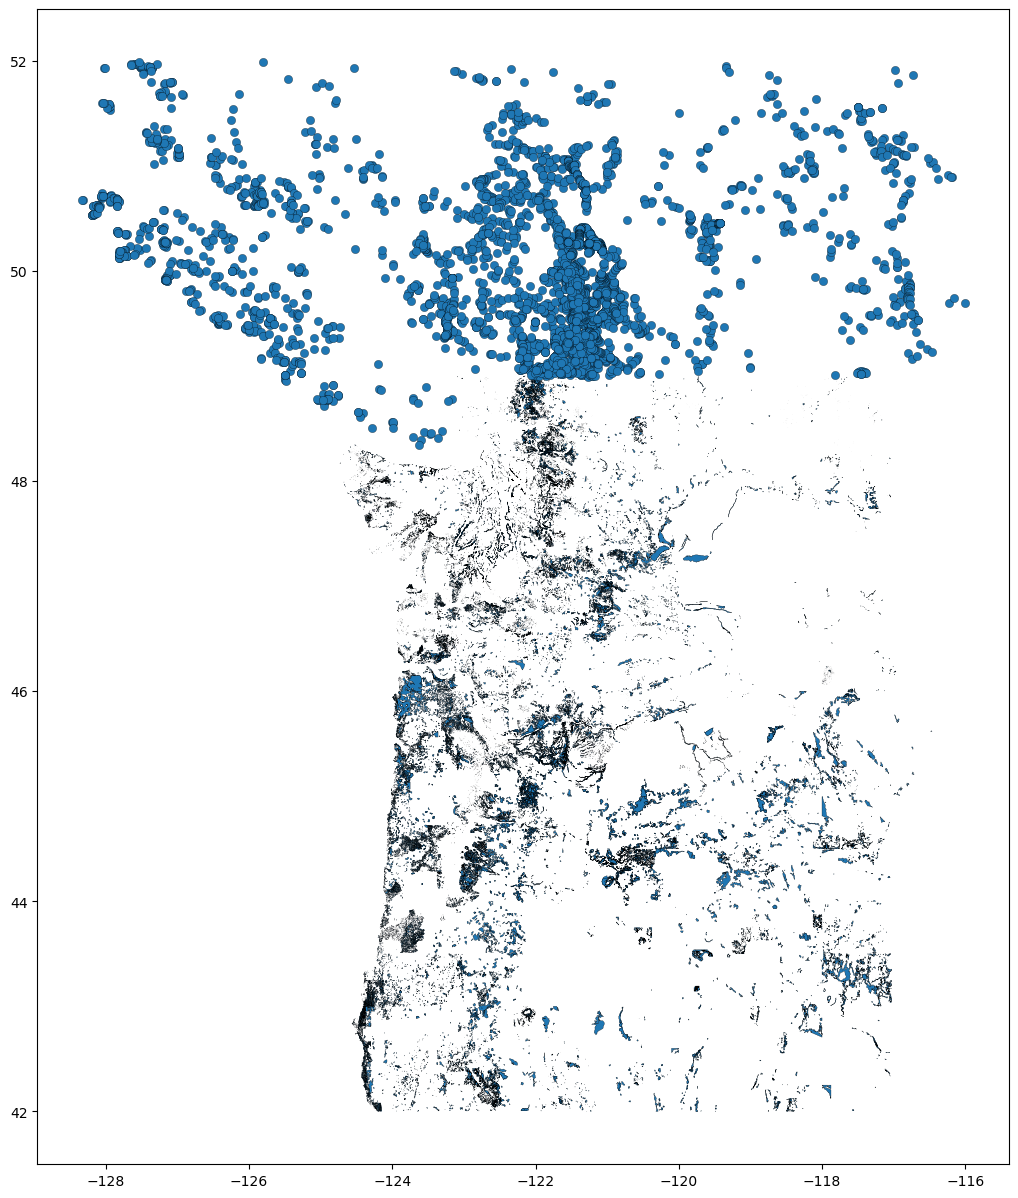

In [9]:
merged_landslides.plot(figsize=(15, 15), edgecolor="k", linewidth=0.2)

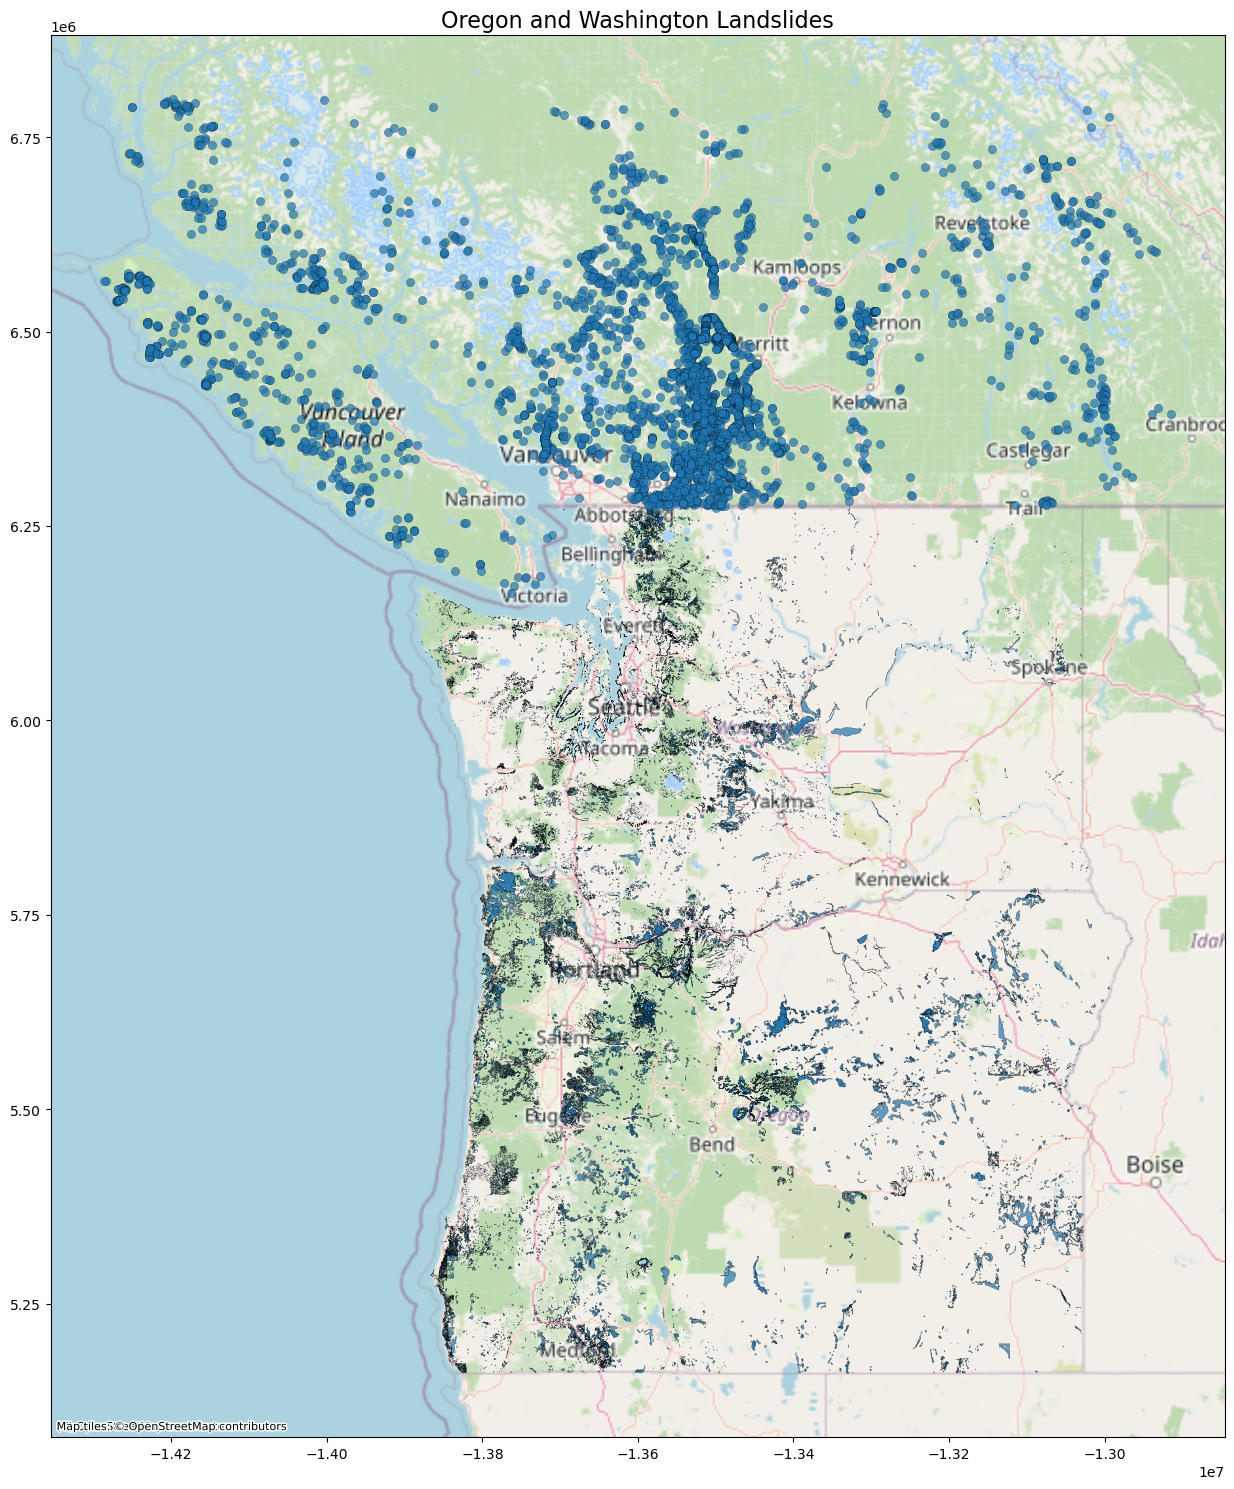

In [11]:
import matplotlib.pyplot as plt
import contextily as ctx

gdf_3857 = merged_landslides.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 15))
gdf_3857.plot(ax=ax, edgecolor="k", linewidth=0.2, alpha=0.7)

# When the axis data is already in EPSG:3857, you can omit the crs argument:
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Oregon and Washington Landslides', fontsize=16)
ctx.add_attribution(ax, "Map tiles: © OpenStreetMap contributors")
plt.tight_layout()
plt.show()
